In [110]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [111]:
df = pd.read_csv("./USA_Hourly_PC.csv")
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index )

In [112]:
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [113]:
def features_generation(df):
    df = df.copy()
    df['hour'] = df.index.hour 
    df['dayofweek'] = df.index.dayofweek
    #df['month'] = df.index.month
    #df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

In [114]:
df_new = features_generation(df)
df_new.head()

,AEP_MW,hour,dayofweek,dayofyear
Datetime,,,,
2004-12-31 01:00:00,13478.0,1,4,366
2004-12-31 02:00:00,12865.0,2,4,366
2004-12-31 03:00:00,12577.0,3,4,366
2004-12-31 04:00:00,12517.0,4,4,366
2004-12-31 05:00:00,12670.0,5,4,366


<AxesSubplot:title={'center':'Hourly Power Consumption in USA'}, xlabel='Datetime'>

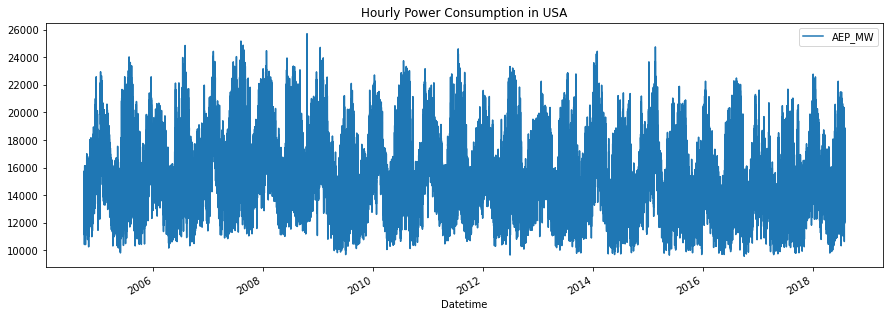

In [115]:
df.plot(figsize=(15,5),title="Hourly Power Consumption in USA")

<AxesSubplot:xlabel='Datetime'>

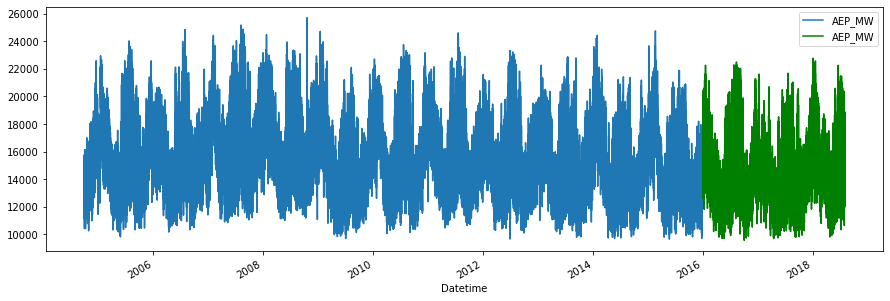

In [116]:
x_train = df.loc[df.index<'01-01-2016']
x_test = df.loc[df.index>='01-01-2016']
fig,ax = plt.subplots(figsize=(15,5))
x_train.plot(ax=ax,label='Training Set')
x_test.plot(ax=ax,label='Testing Set',color='g')

In [117]:
train = features_generation(x_train)
test = features_generation(x_test)

In [118]:
train

,AEP_MW,hour,dayofweek,dayofyear
Datetime,,,,
2004-12-31 01:00:00,13478.0,1,4,366
2004-12-31 02:00:00,12865.0,2,4,366
2004-12-31 03:00:00,12577.0,3,4,366
2004-12-31 04:00:00,12517.0,4,4,366
2004-12-31 05:00:00,12670.0,5,4,366
...,...,...,...,...
2015-01-01 20:00:00,16586.0,20,3,1
2015-01-01 21:00:00,16312.0,21,3,1
2015-01-01 22:00:00,15859.0,22,3,1


In [124]:
x_train = train.drop(['AEP_MW'],axis=1).values.reshape((len(train), 3))
y_train = train['AEP_MW'].values.reshape((len(train), 1))

scaler_train = MinMaxScaler(feature_range=(0, 1))
scaler_label = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler_train.fit_transform(x_train)
y_train_scaled = scaler_label.fit_transform(y_train)
train_scaled = np.hstack((x_train_scaled, y_train_scaled))

train_scaled.shape

(98593, 4)

In [125]:
train_scaled

array([[0.04347826, 0.66666667, 1.        , 0.23800911],
       [0.08695652, 0.66666667, 1.        , 0.19977546],
       [0.13043478, 0.66666667, 1.        , 0.18181251],
       ...,
       [0.95652174, 0.5       , 0.        , 0.38651531],
       [1.        , 0.5       , 0.        , 0.34510073],
       [0.        , 0.66666667, 0.00273973, 0.31559908]])

In [126]:
def to_supervised(train, n_input, n_out):
	X, y = [], []
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(train)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end < len(train):
			x_input = train[in_start:in_end]
			x_input = x_input.reshape((len(x_input), 4))
			X.append(x_input)
			y.append(train[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return np.array(X), np.array(y)


In [130]:
x_train, y_train = to_supervised(train_scaled,60,1)
print(x_train.shape), print(y_train.shape)

(98532, 60, 4)
(98532, 1)


(None, None)

In [128]:
x_test = test.drop(['AEP_MW'],axis=1).values.reshape((len(test), 3))
y_test = test['AEP_MW'].values.reshape((len(test), 1))

x_test_scaled = scaler_train.transform(x_test)
y_test_scaled = scaler_label.transform(y_test)
test_scaled = np.hstack((x_test_scaled, y_test_scaled))

test_scaled.shape

(22680, 4)

In [131]:
x_test, y_test = to_supervised(test_scaled,60,1)
print(x_test.shape), print(y_test.shape)

(22619, 60, 4)
(22619, 1)


(None, None)

In [132]:
x_train

array([[[0.04347826, 0.66666667, 1.        , 0.23800911],
        [0.08695652, 0.66666667, 1.        , 0.19977546],
        [0.13043478, 0.66666667, 1.        , 0.18181251],
        ...,
        [0.43478261, 0.33333333, 0.99452055, 0.47395996],
        [0.47826087, 0.33333333, 0.99452055, 0.46978108],
        [0.52173913, 0.33333333, 0.99452055, 0.45836712]],

       [[0.08695652, 0.66666667, 1.        , 0.19977546],
        [0.13043478, 0.66666667, 1.        , 0.18181251],
        [0.17391304, 0.66666667, 1.        , 0.17807023],
        ...,
        [0.47826087, 0.33333333, 0.99452055, 0.46978108],
        [0.52173913, 0.33333333, 0.99452055, 0.45836712],
        [0.56521739, 0.33333333, 0.99452055, 0.44202582]],

       [[0.13043478, 0.66666667, 1.        , 0.18181251],
        [0.17391304, 0.66666667, 1.        , 0.17807023],
        [0.2173913 , 0.66666667, 1.        , 0.18761305],
        ...,
        [0.52173913, 0.33333333, 0.99452055, 0.45836712],
        [0.56521739, 0.333333

In [171]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout
import tensorflow as tf

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(60,4)))
model.add(Dropout(0.2))

model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [172]:
model.fit(x_train,y_train,epochs=1,batch_size=32,verbose=1)

3080/3080 [==============================] - 217s 67ms/step - loss: 0.0102


In [173]:
y_test_predict=model.predict(x_test)


707/707 [==============================] - 16s 21ms/step


In [174]:
y_test_predict.shape

(22619, 1)

In [175]:
y_test_predict

array([[0.51212054],
       [0.5561797 ],
       [0.59921926],
       ...,
       [0.8902191 ],
       [0.93941516],
       [0.9261075 ]], dtype=float32)

In [176]:
y_test_predict=scaler_label.inverse_transform(y_test_predict)
y_test_predict

array([[17872.83 ],
       [18579.23 ],
       [19269.283],
       ...,
       [23934.883],
       [24723.645],
       [24510.281]], dtype=float32)

In [177]:
y_test_predict.shape

(22619, 1)

In [178]:
test.shape

(22619, 5)

In [179]:
test_60 =  df[-22620:-1]

In [180]:
test_60.shape

(22619, 1)

In [182]:
test_60['prediction'] = y_test_predict

C:\Users\Pritesh Borad\AppData\Local\Temp\ipykernel_10152\579486569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_60['prediction'] = y_test_predict


In [183]:
test_60

,AEP_MW,prediction
Datetime,,
2016-12-29 12:00:00,15396.0,17872.830078
2016-12-29 13:00:00,15259.0,18579.230469
2016-12-29 14:00:00,15116.0,19269.283203
2016-12-29 15:00:00,14825.0,19940.494141
2016-12-29 16:00:00,14869.0,20596.648438
...,...,...
2018-01-01 19:00:00,20925.0,22384.464844
2018-01-01 20:00:00,21089.0,23173.359375
2018-01-01 21:00:00,20999.0,23934.882812


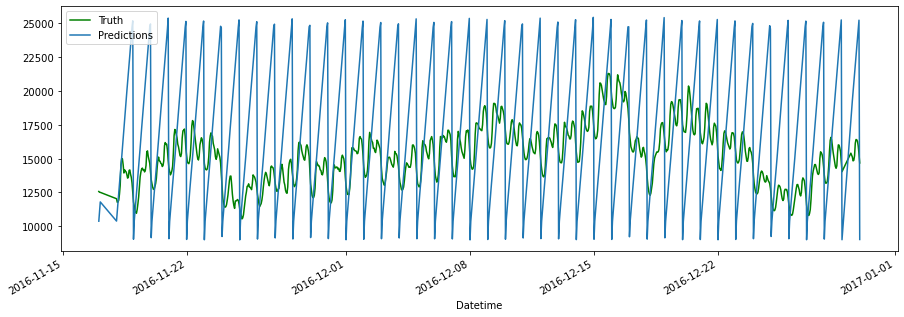

In [184]:
fig,ax = plt.subplots(figsize=(15,5))
test_60[0:1000]['AEP_MW'].plot(ax=ax,color='g')
test_60[0:1000]['prediction'].plot(ax=ax)
plt.legend(['Truth','Predictions'])
plt.show()